# Criação do Dataset Balanceado

## CICDDoS2019

### Dia de coleta 01/12

In [2]:
from py.DatasetHandler import DatasetHandler

handler = DatasetHandler(logging=True)

handler.create_balanced_dataset(
    src_dir="datasets/CICDDoS2019/Origin/01-12", 
    dest_dir="datasets/CICDDoS2019/data/01-12/Classification", 
    output_filename="BALANCED.CSV", 
    n_samples_per_class=10000,
    chunk_size=100000,
    target_files=None,
    ignored_classes=['WebDDoS'],
    allow_insufficient=True
)

PROCESSAMENTO OTIMIZADO (CHUNKS): BALANCED.CSV
Arquivos Selecionados: 11
Tamanho do Lote (Chunksize): 100000
Classes Ignoradas: ['WebDDoS']

[*] Varredura global (Lendo em lotes)...
[*] Validando quantidades disponíveis...

[*] Coletando e Salvando em disco (Lotes de 100000)...
   -> Processando: DrDoS_DNS.csv
   -> Processando: DrDoS_LDAP.csv
   -> Processando: DrDoS_MSSQL.csv
   -> Processando: DrDoS_NetBIOS.csv
   -> Processando: DrDoS_NTP.csv
   -> Processando: DrDoS_SNMP.csv
   -> Processando: DrDoS_SSDP.csv
   -> Processando: DrDoS_UDP.csv
   -> Processando: Syn.csv
      [IO] Buffer cheio (100000 linhas). Salvando lote no disco...
   -> Processando: TFTP.csv
   -> Processando: UDPLag.csv
      [IO] Salvando lote final (20000 linhas)...

CONCLUÍDO COM SUCESSO
Arquivo gerado: datasets/CICDDoS2019/data/01-12/Classification\BALANCED.CSV


# Análise de Similaridade

## CICDDoS2019

### Dia de coleta 01/12

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com ZERO.
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Nenhuma técnica selecionada. Mantendo todas as colunas.
Finalização: Retornando DataFrame pandas processado.


 INICIANDO EXTRAÇÃO DE FEATURES OVR (ONE-VS-REST)
 [*] Analisando Assinatura Local: BENIGN vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_DNS vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_LDAP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_MSSQL vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_NTP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_NetBIOS vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_SNMP vs Resto do Tráfego...
 [*] Analisando Assinatura Local: DrDoS_SSDP vs Resto do Tráfego...
 [*] Anali

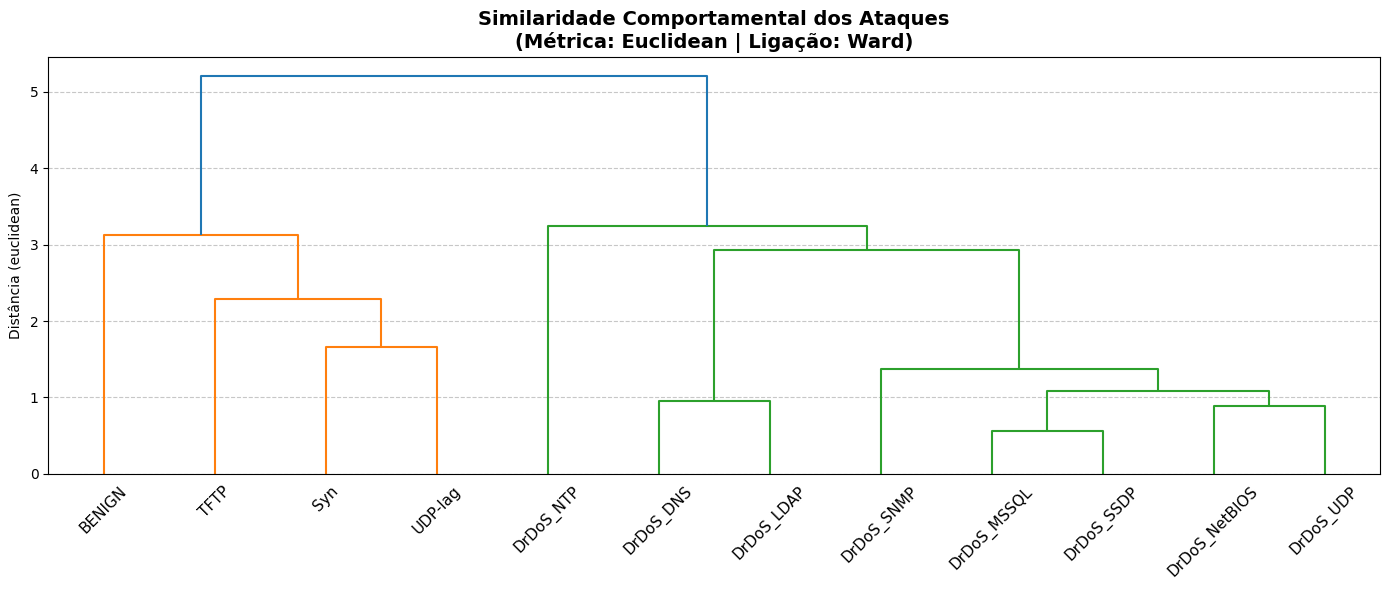


 [*] Gerando Mapa de Calor de Features (Ordenado)...


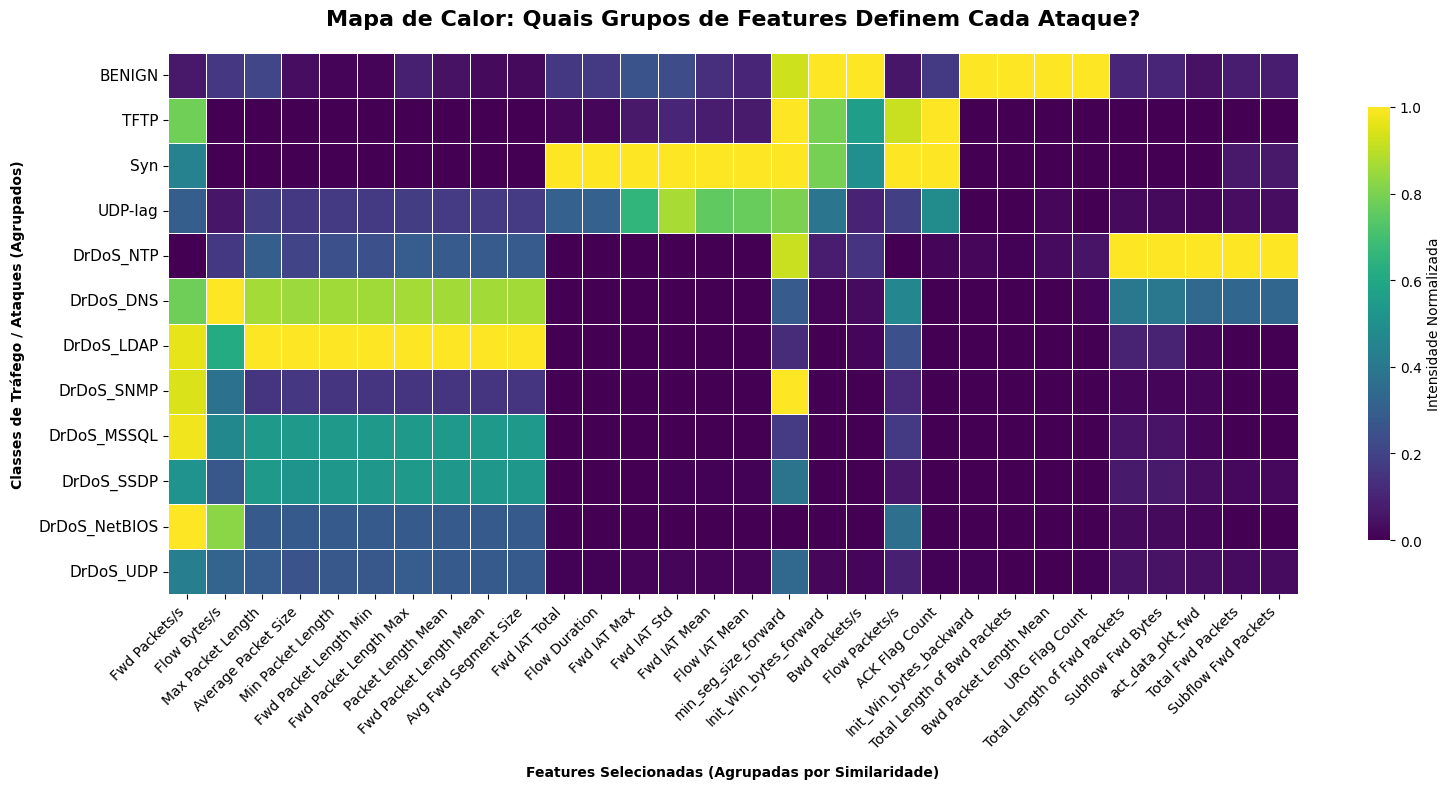

In [12]:
import pandas as pd
from py.DataStreamProcessor import DataStreamProcessor
from py.DatasetHandler import DatasetHandler

# Instancia as duas ferramentas
processor = DataStreamProcessor(logging=True)
handler = DatasetHandler(logging=True)

# Carrega o CSV 
df_bruto = pd.read_csv('datasets/CICDDoS2019/data/01-12/BALANCED.CSV')

# Pré-Processamento 
X_df, y_array, target_names = processor.create_stream(
    df=df_bruto,
    target_label_col='Label',
    binary_label=False,               # Falso pois queremos ver CADA ataque separado
    normalize_method='MinMaxScaler',  # Normaliza entre 0 e 1
    imputation_method='0',            # Substitui NaNs por 0
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol', 'Inbound'],
    return_stream=False               # Retorna (DataFrame de Features, Array de Labels, Nomes)
)

# Executa a Seleção OvR (One-vs-Rest)
dict_features, vetor_features_finais = handler.extract_ovr_feature_importance(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    top_per_class=7 
)

# Plota os Dendrogramas e Mapas de Calor
handler.plot_similarity_and_feature_groups(
    X=X_df, 
    y=y_array, 
    target_names=target_names,
    selected_features=vetor_features_finais, 
    metric='euclidian',   # cosine / euclidian
    linkage_method='ward' # average / ward 
)

# Criando gráfico de radar

### Coleta dia de coleta 01/12

Limpeza: Removendo espaços, identificadores (Flow ID, Timestamp, Unnamed: 0) e colunas vazias...
Pré-processamento: Convertendo infinitos...
Tratamento de Nulos: Preenchendo com a MEDIANA das colunas...
Normalização: MinMaxScaler
Target: Processando coluna 'Label' como Multiclasse...
Seleção de Features: Iniciando pipeline de redução de dimensionalidade...

--- Iniciando Processo de Seleção de Features (Total: 78) ---
Variância: 46 features removidas. Restantes: 32
Remover Correlação: Pular.
Random Forest: Top 15 selecionadas.
Features Finais (15) - ['Average Packet Size', 'Avg Fwd Segment Size', 'Packet Length Mean', 'Fwd Packet Length Mean', 'Min Packet Length', 'Fwd Packet Length Min', 'Fwd Packets/s', 'Fwd IAT Total', 'Flow Duration', 'Init_Win_bytes_forward', 'ACK Flag Count', 'Inbound', 'Flow IAT Max', 'Flow IAT Mean', 'min_seg_size_forward']
--- Fim do Processo de Seleção de Features ---

Finalização: Retornando DataFrame pandas processado.



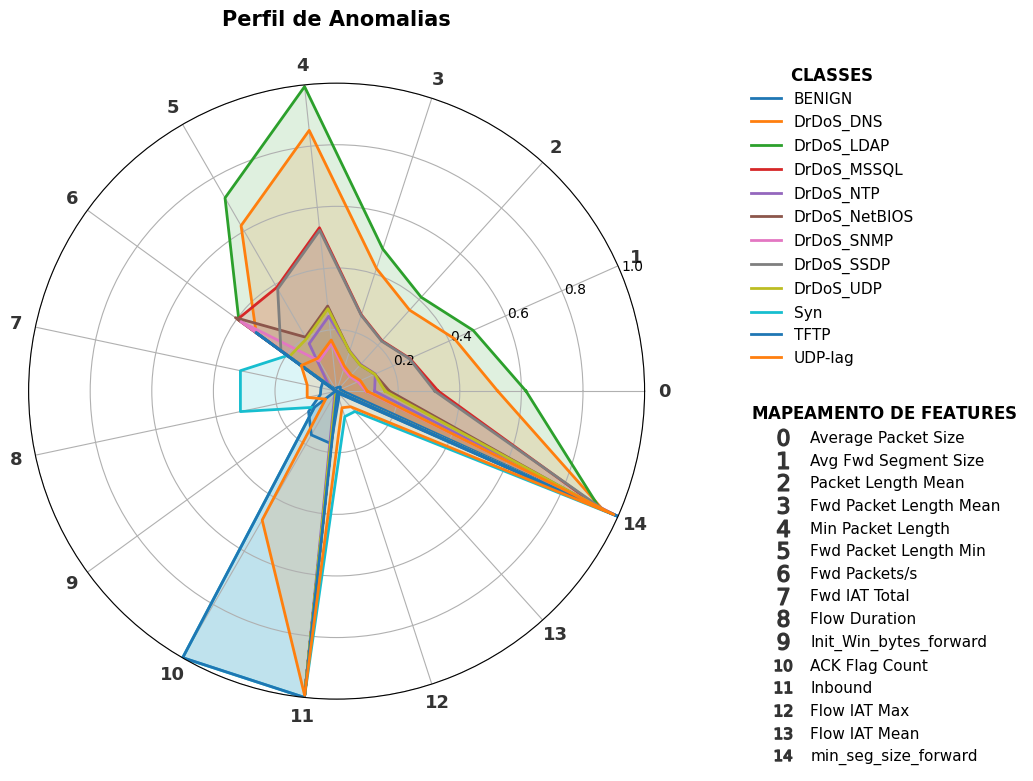

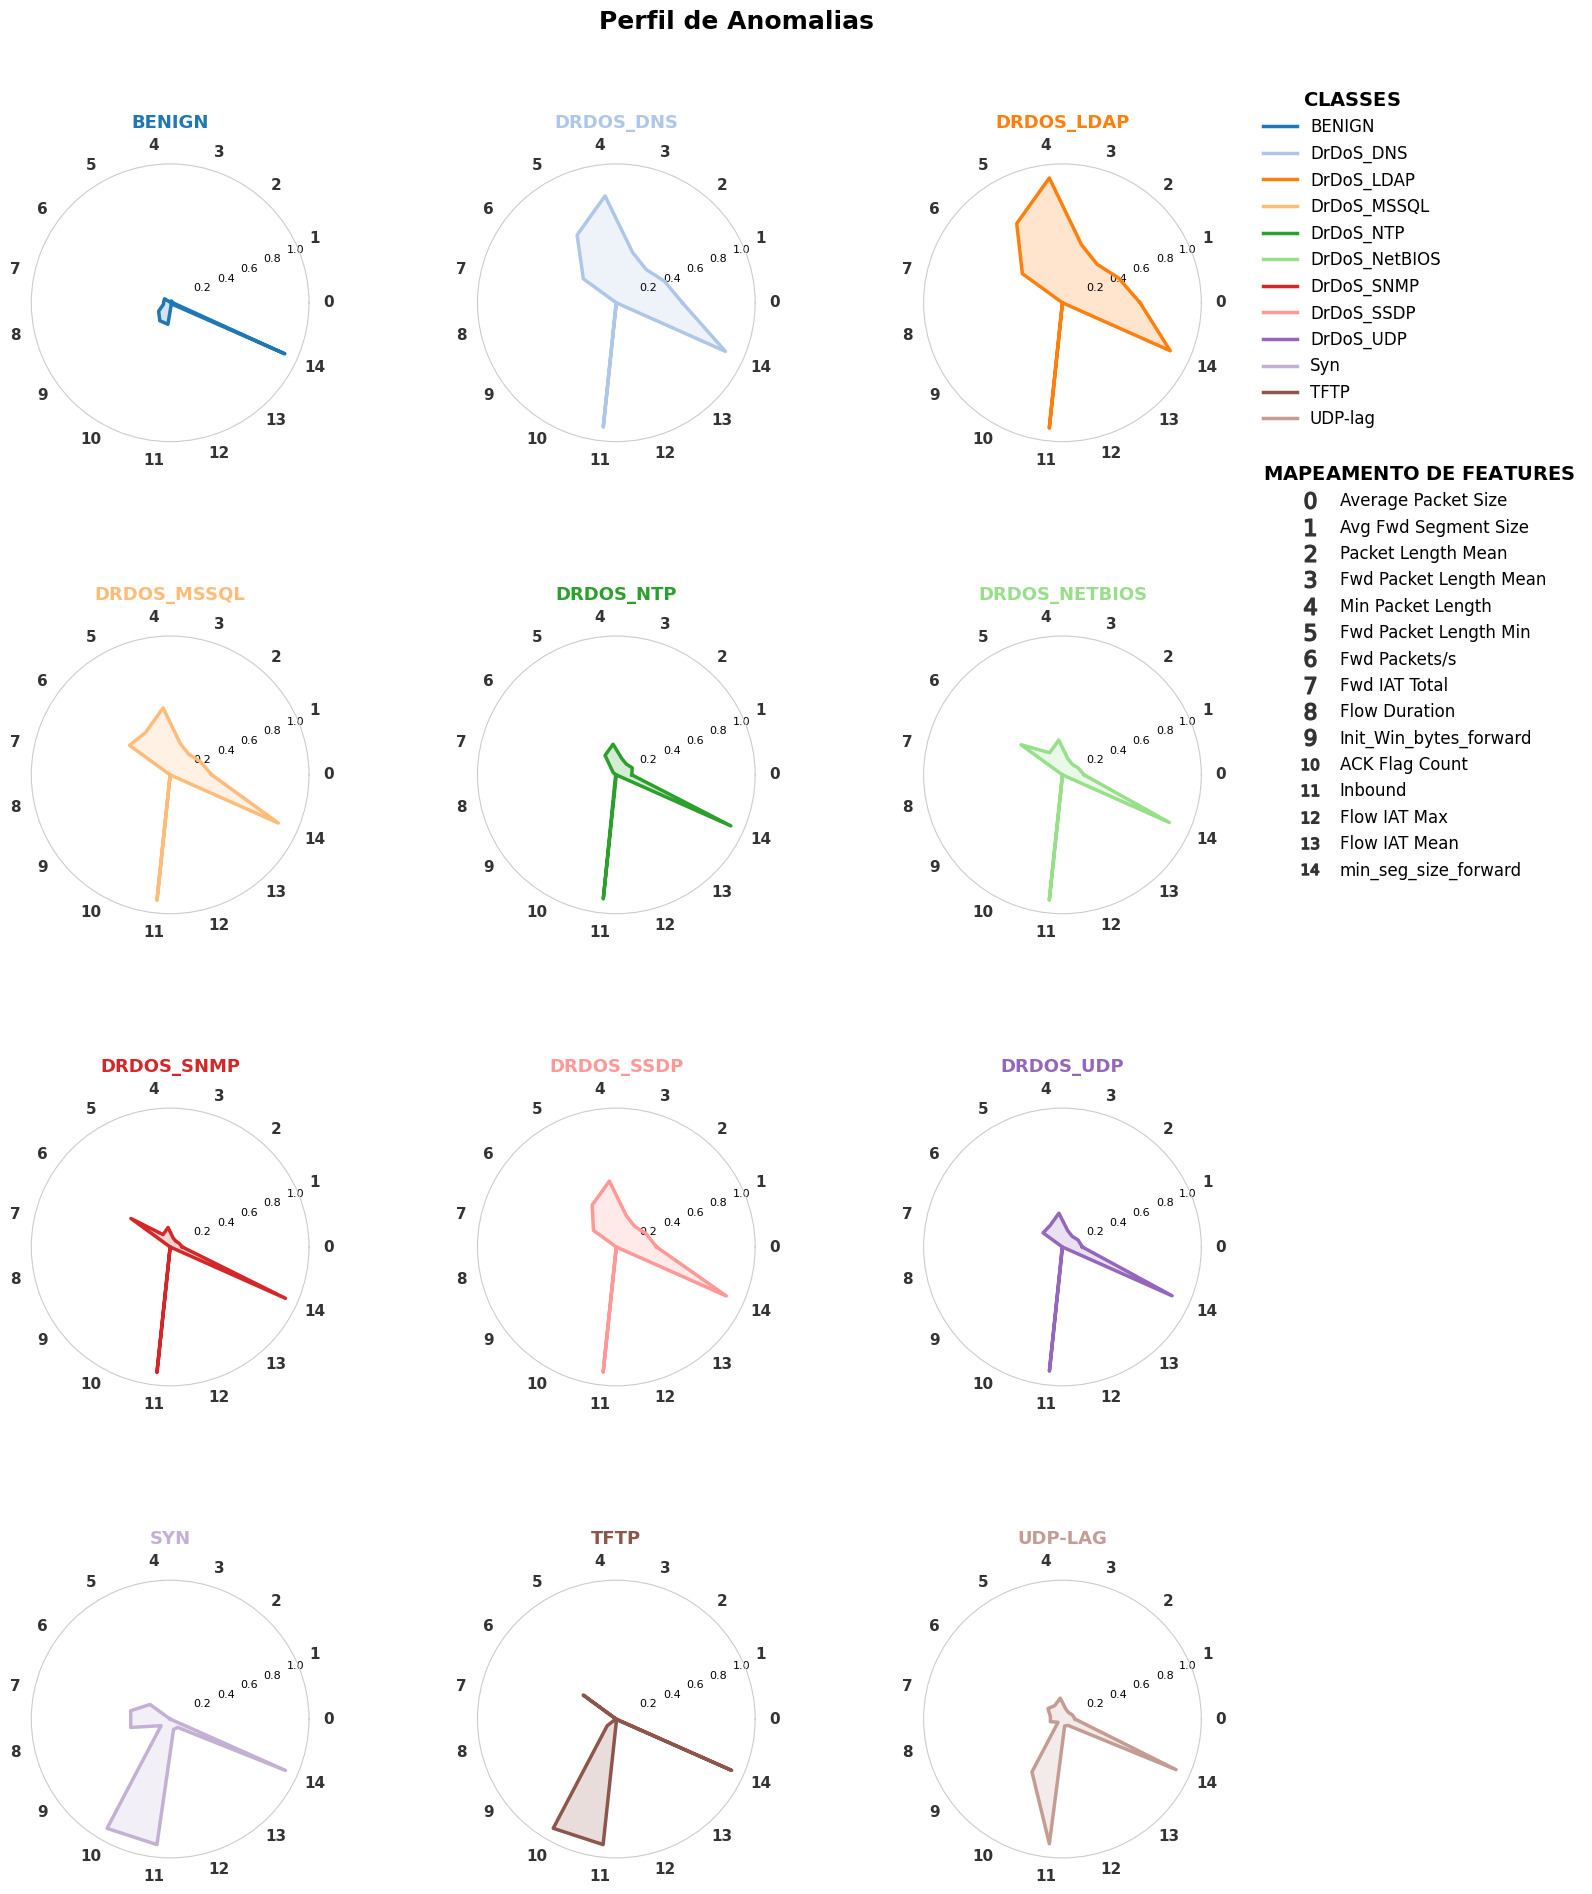

In [4]:
from py.DataStreamProcessor import DataStreamProcessor
from py.DatasetHandler import DatasetHandler
import pandas as pd

handler = DatasetHandler(logging=True)
processor = DataStreamProcessor(logging=True)

df = pd.read_csv('datasets/CICDDoS2019/data/01-12/BALANCED.CSV')

stream, targets, features = processor.create_stream(
    df=df, 
    target_label_col='Label', 
    binary_label=False, 
    normalize_method="MinMaxScaler", 
    threshold_var=0.001,
    threshold_corr=None,
    top_n_features=15,
    return_stream=False,
    extra_ignore_cols=['Source IP', 'Source Port','Destination IP','Destination Port','Protocol'],
    imputation_method='mediana'
)

handler.plot_feature_radar(stream, targets, features)
handler.plot_mini_radars(stream, targets, features)

# Criação de cenários CICDDoS2019 01/12

## Amostras: 15k 

In [8]:
AMOSTRAS = [25, 250, 500, 1000, 2000]
BASELINE = "data/BENIGN.csv"
INPUT_FOLDER = "datasets/CICDDoS2019/01-12"
OUTPUT_FOLDER = "data/15k"

### Cenário de Consistência

![CONSISTENCIA](datasets/CICDDoS2019/img/CONSISTENCIA.png)


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15003
DrDoS_DNS       72


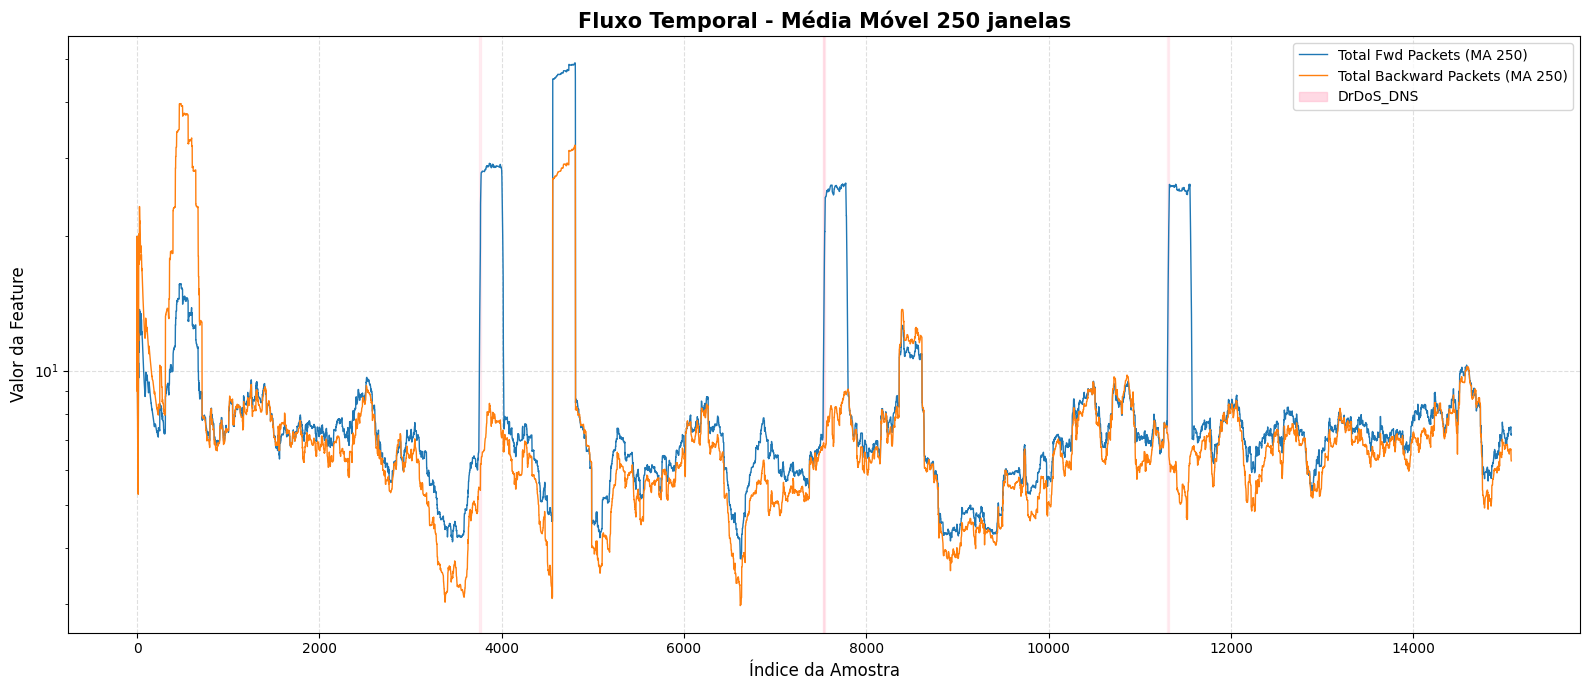


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15226
DrDoS_DNS      524


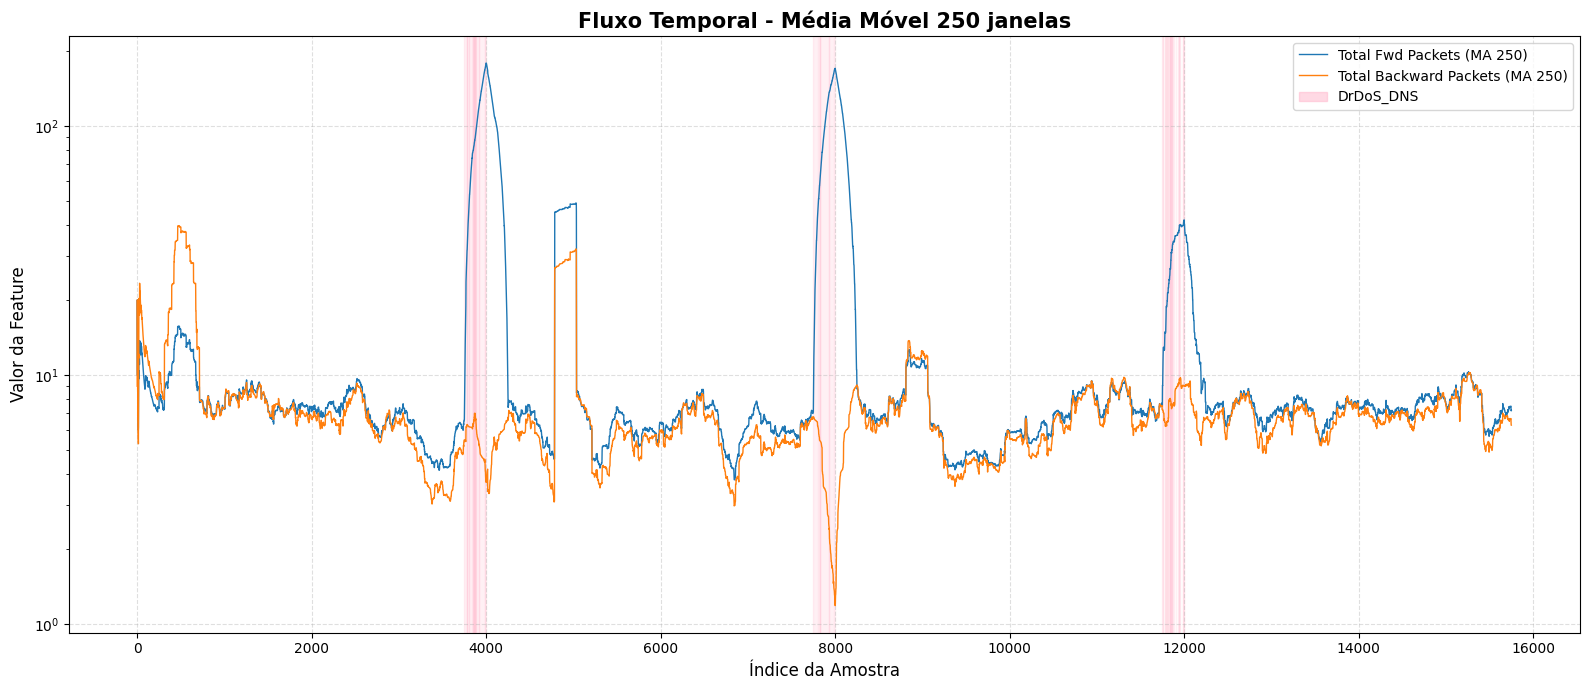


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15425
DrDoS_DNS     1075


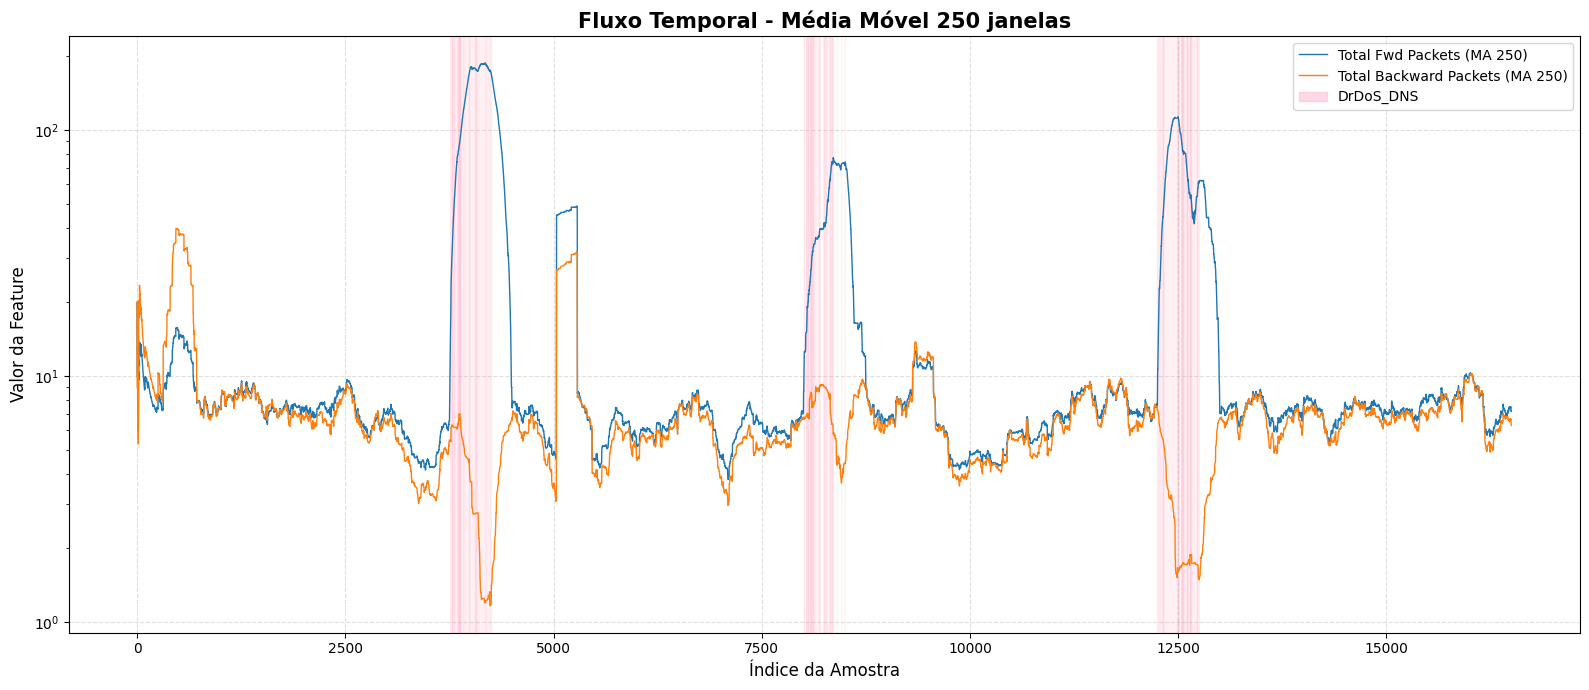


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15507
DrDoS_DNS     2493


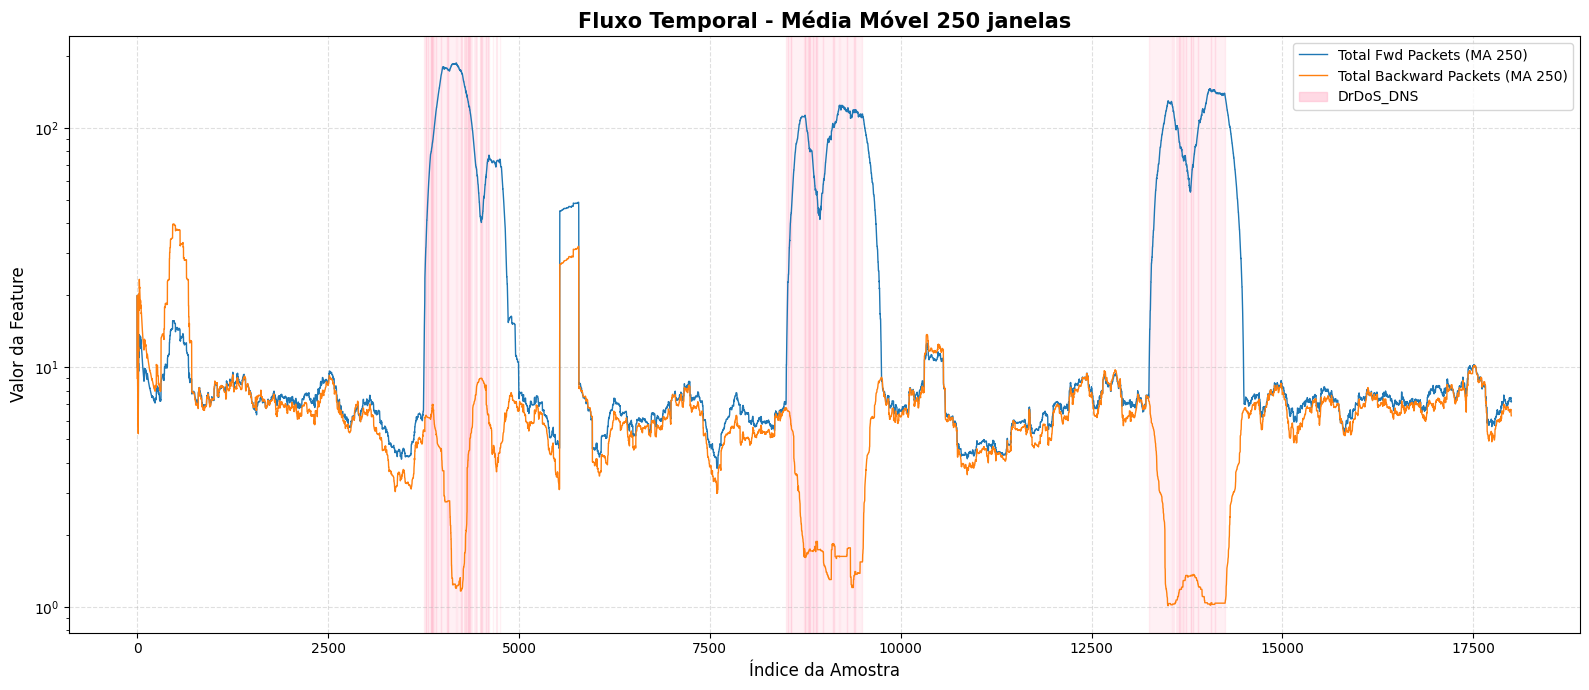


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15623
DrDoS_DNS     5377


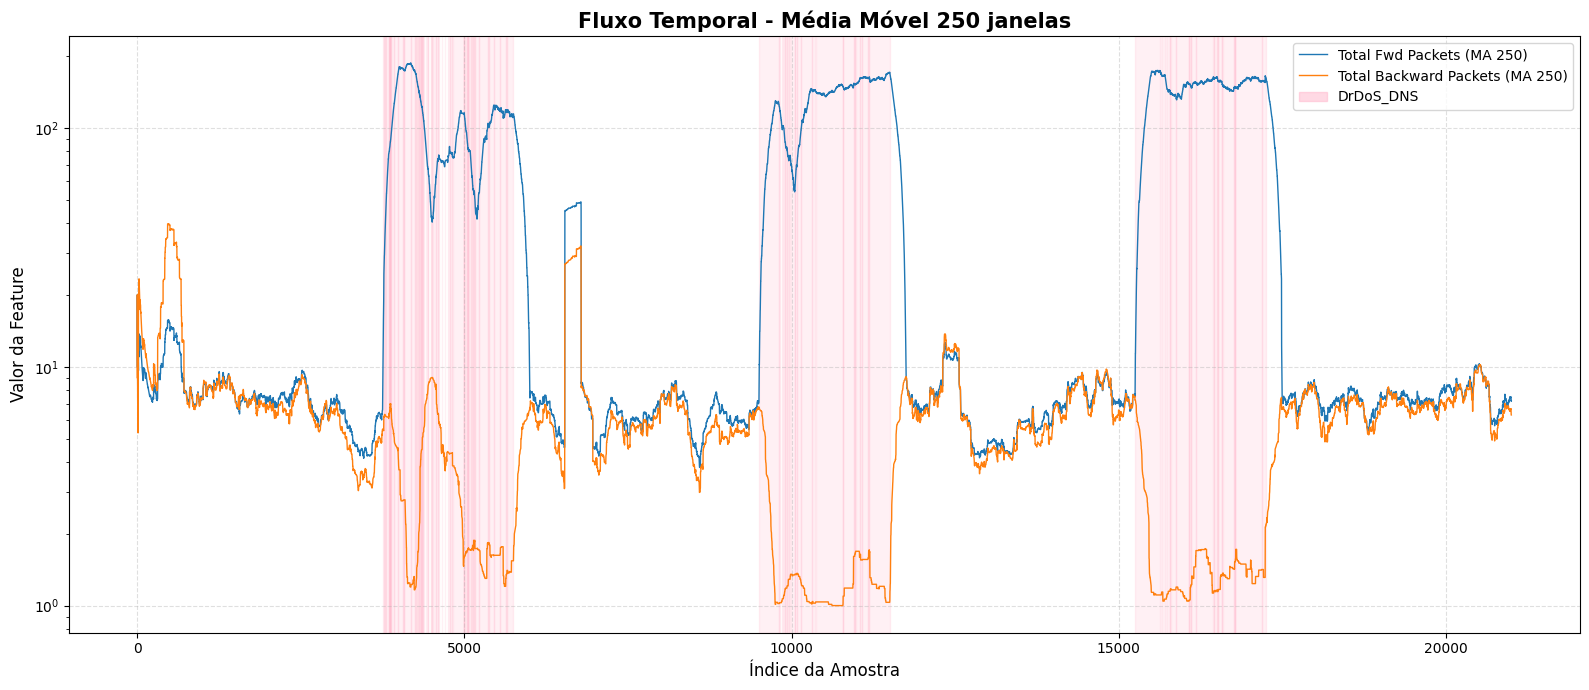

In [10]:
from py.ScenarioGenerator import ScenarioGenerator

for qtd_amostras in AMOSTRAS:
    
    meu_cenario = [
        ("DrDoS_DNS.csv", qtd_amostras),
        ("DrDoS_DNS.csv", qtd_amostras),
        ("DrDoS_DNS.csv", qtd_amostras)
    ]

    caminho_saida = f"{OUTPUT_FOLDER}/Consistência/Consistência_{qtd_amostras}.csv"

    gerador = ScenarioGenerator(
        input_folder=INPUT_FOLDER,
        output_path=caminho_saida,
        baseline_file=BASELINE,
        logging=True,
        n_benign_samples=15000, 
        sort_by_timestamp=False,
        remove_duplicates=False
    )

    gerador.generate(meu_cenario)
    gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Cenário Generalização

![GENERALIZACAO](datasets/CICDDoS2019/img/GENERALIZACAO.png)


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 25 amostras de DrDoS_LDAP.csv (Sem filtro).
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15002
DrDoS_DNS        48
DrDoS_LDAP       25


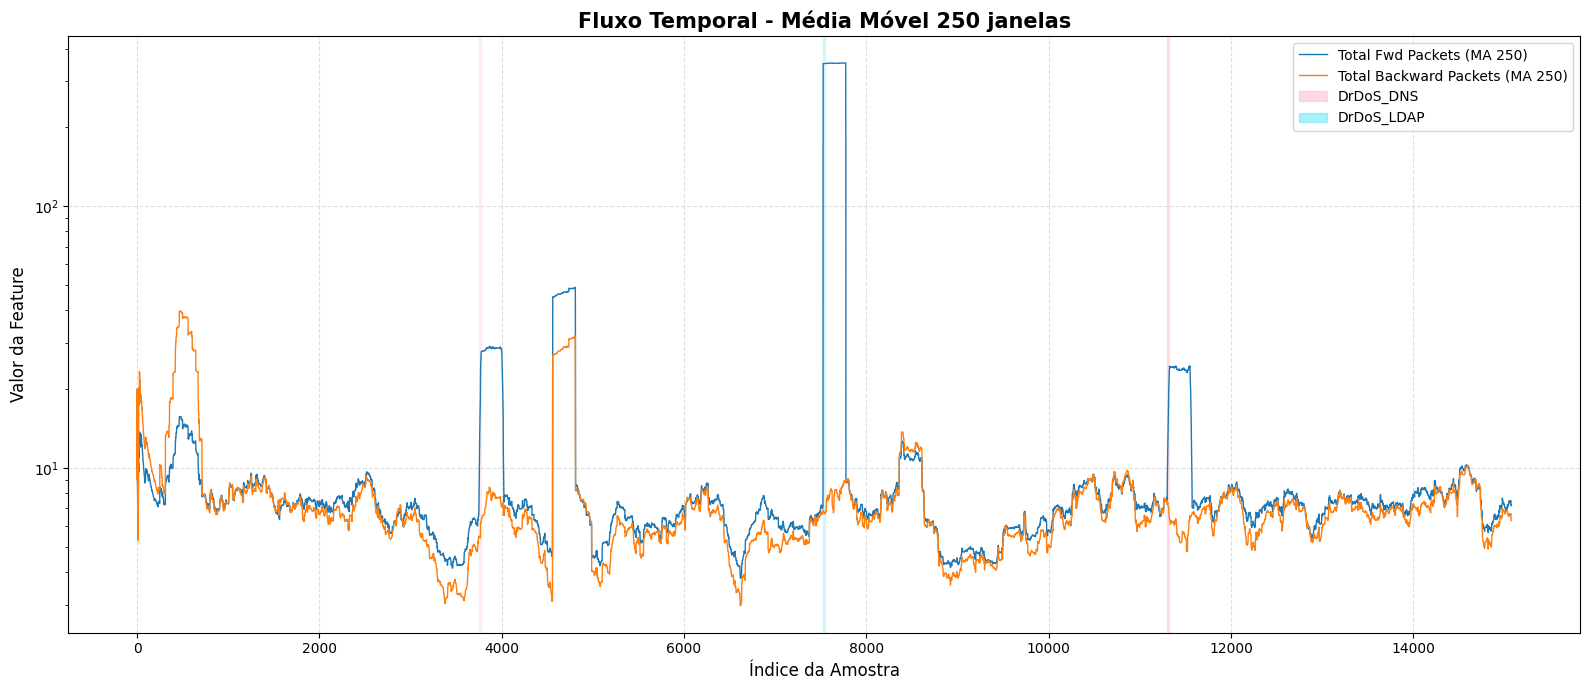


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_LDAP.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15030
DrDoS_DNS       470
DrDoS_LDAP      250


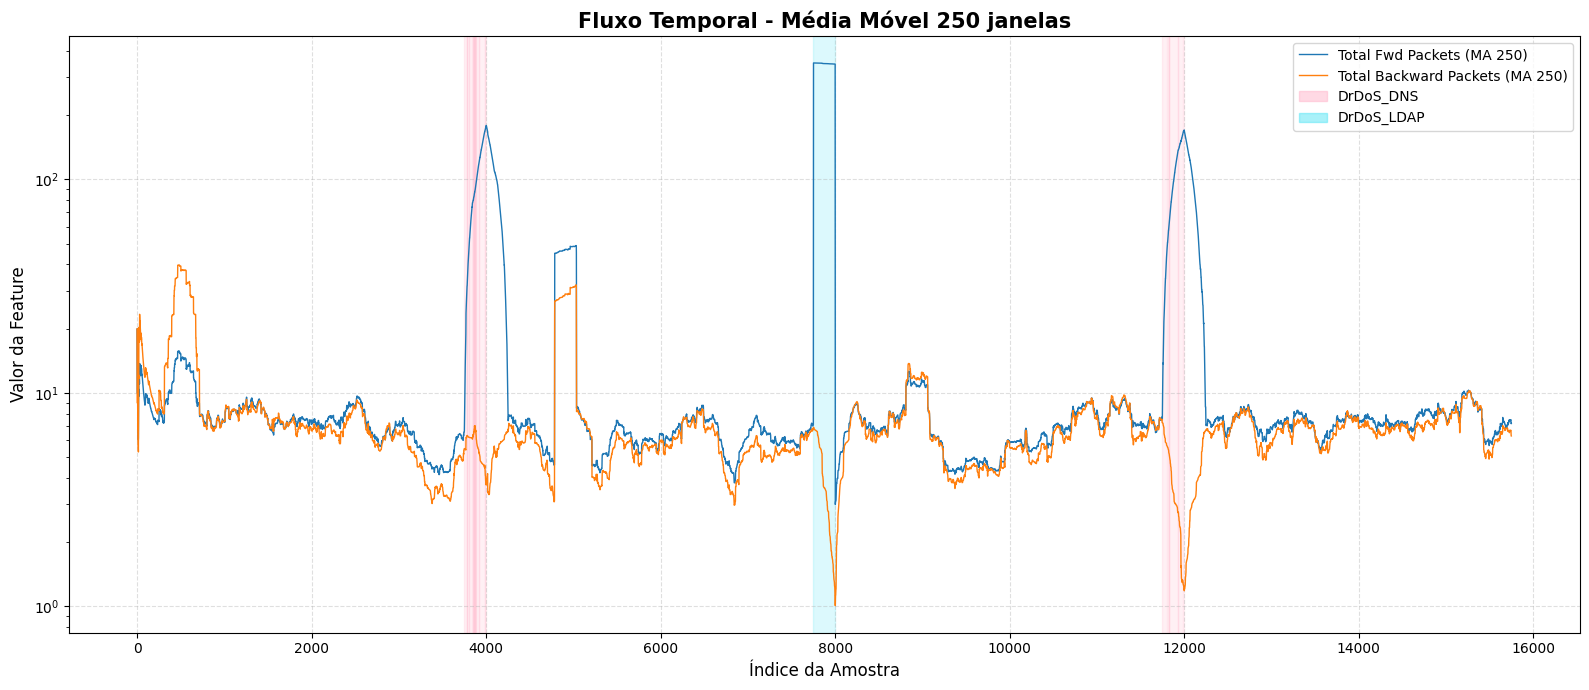


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 500 amostras de DrDoS_LDAP.csv (Sem filtro).
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15366
DrDoS_DNS       634
DrDoS_LDAP      500


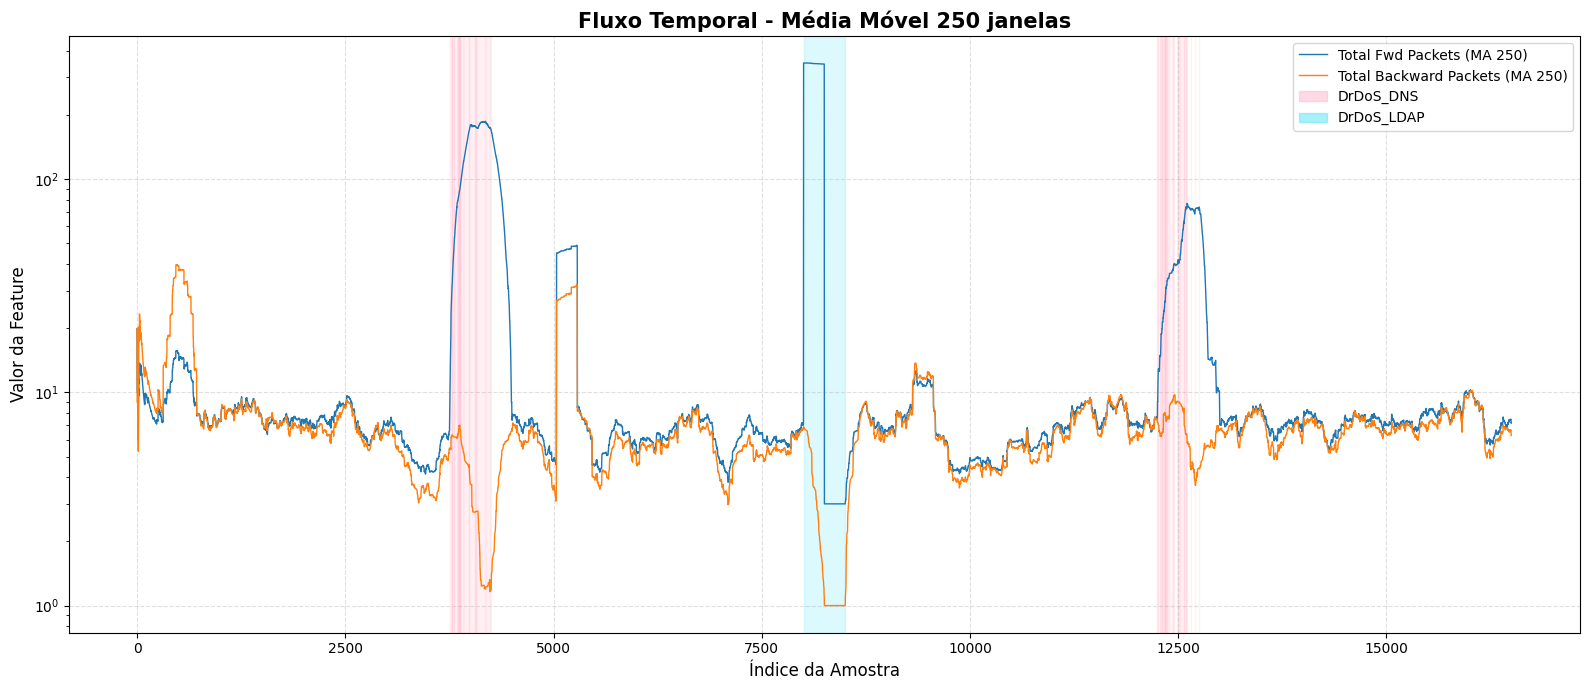


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de DrDoS_LDAP.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15431
DrDoS_DNS      1569
DrDoS_LDAP     1000


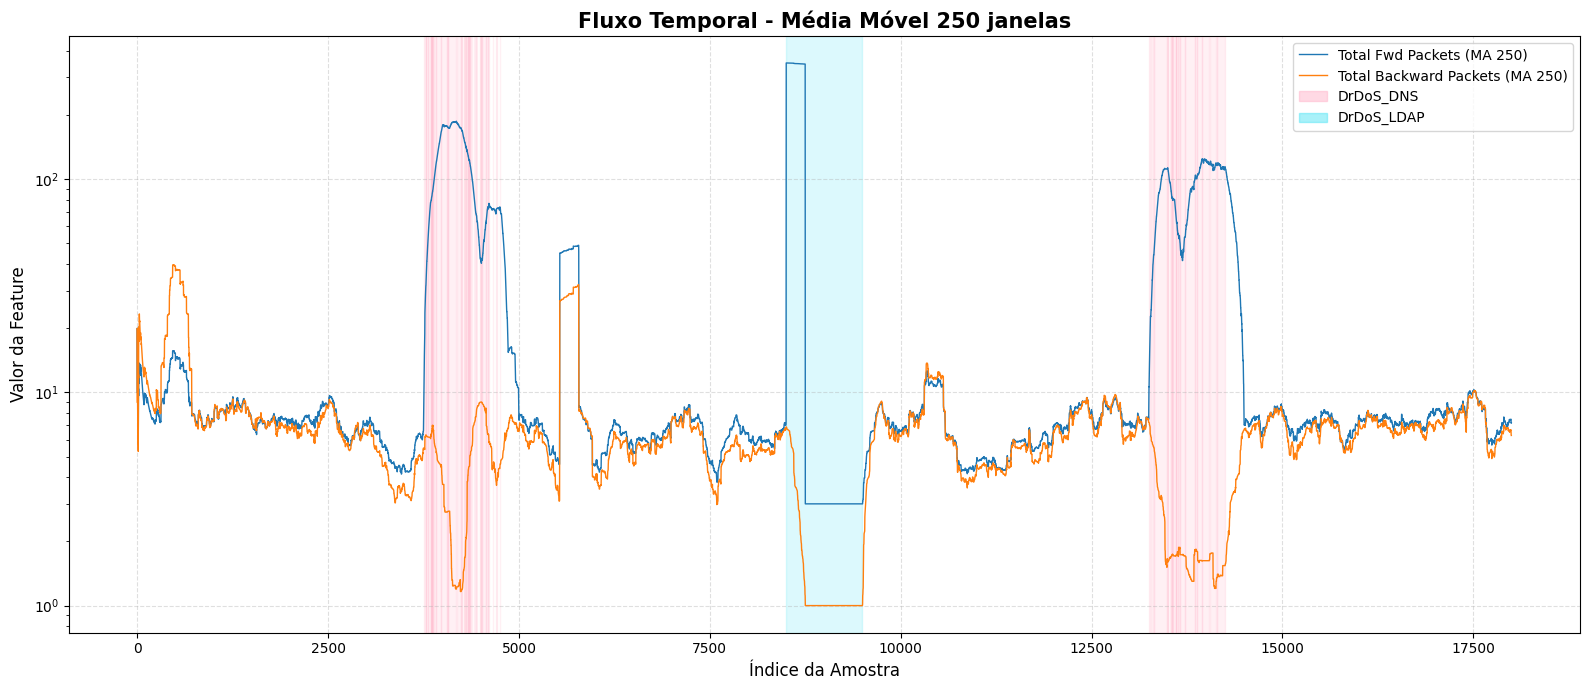


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de DrDoS_LDAP.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15520
DrDoS_DNS      3480
DrDoS_LDAP     2000


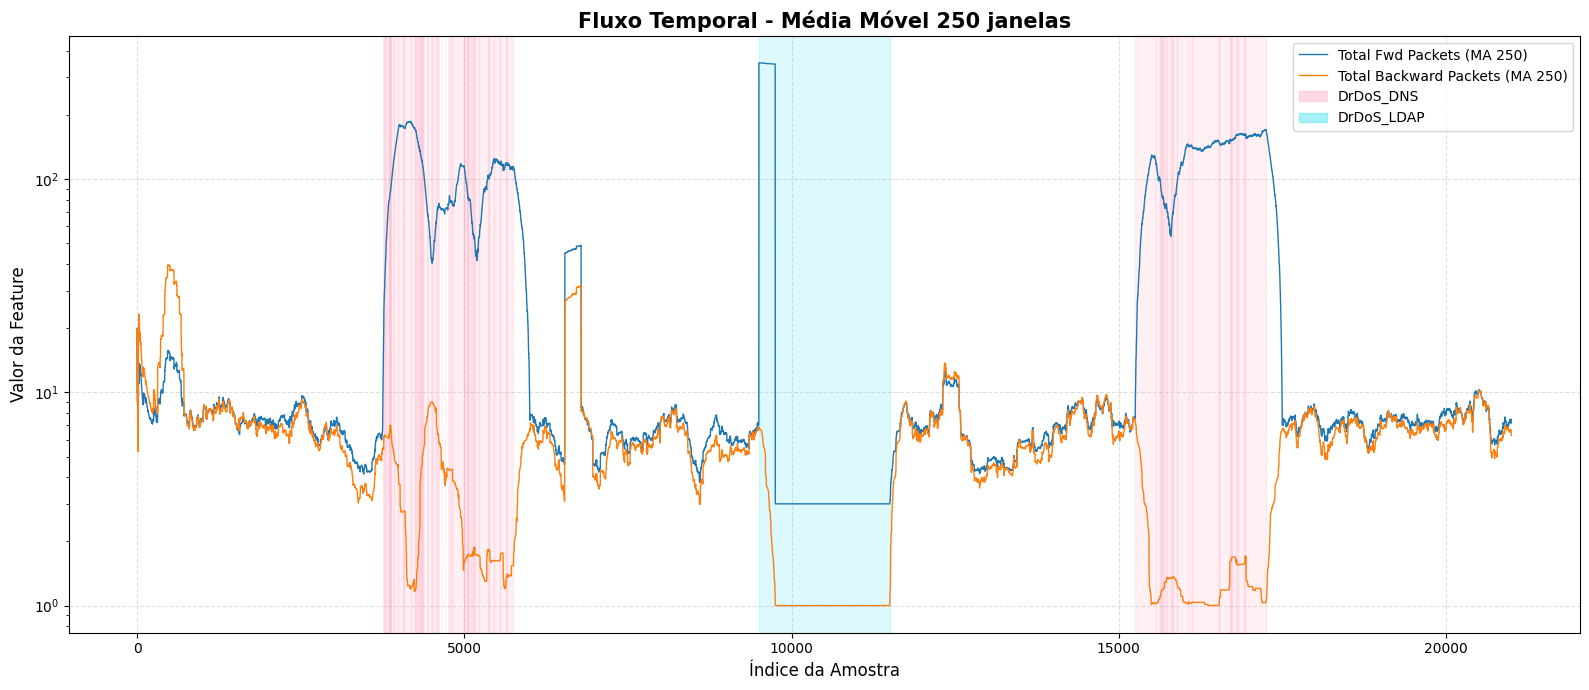

In [12]:
from py.ScenarioGenerator import ScenarioGenerator

for qtd_amostras in AMOSTRAS:
    
    meu_cenario = [
        ("DrDoS_DNS.csv", qtd_amostras),
        ("DrDoS_LDAP.csv", qtd_amostras),
        ("DrDoS_DNS.csv", qtd_amostras)
    ]

    caminho_saida = f"{OUTPUT_FOLDER}/Generalização/Generalização_{qtd_amostras}.csv"

    gerador = ScenarioGenerator(
        input_folder=INPUT_FOLDER,
        output_path=caminho_saida,
        baseline_file=BASELINE,
        logging=True,
        n_benign_samples=15000, 
        sort_by_timestamp=False,
        remove_duplicates=False
    )

    gerador.generate(meu_cenario)
    gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Cenário Adaptação

![ADAPTACAO](datasets/CICDDoS2019/img/ADAPTACAO.png)


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 25 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15004
DrDoS_DNS       48
Syn             23


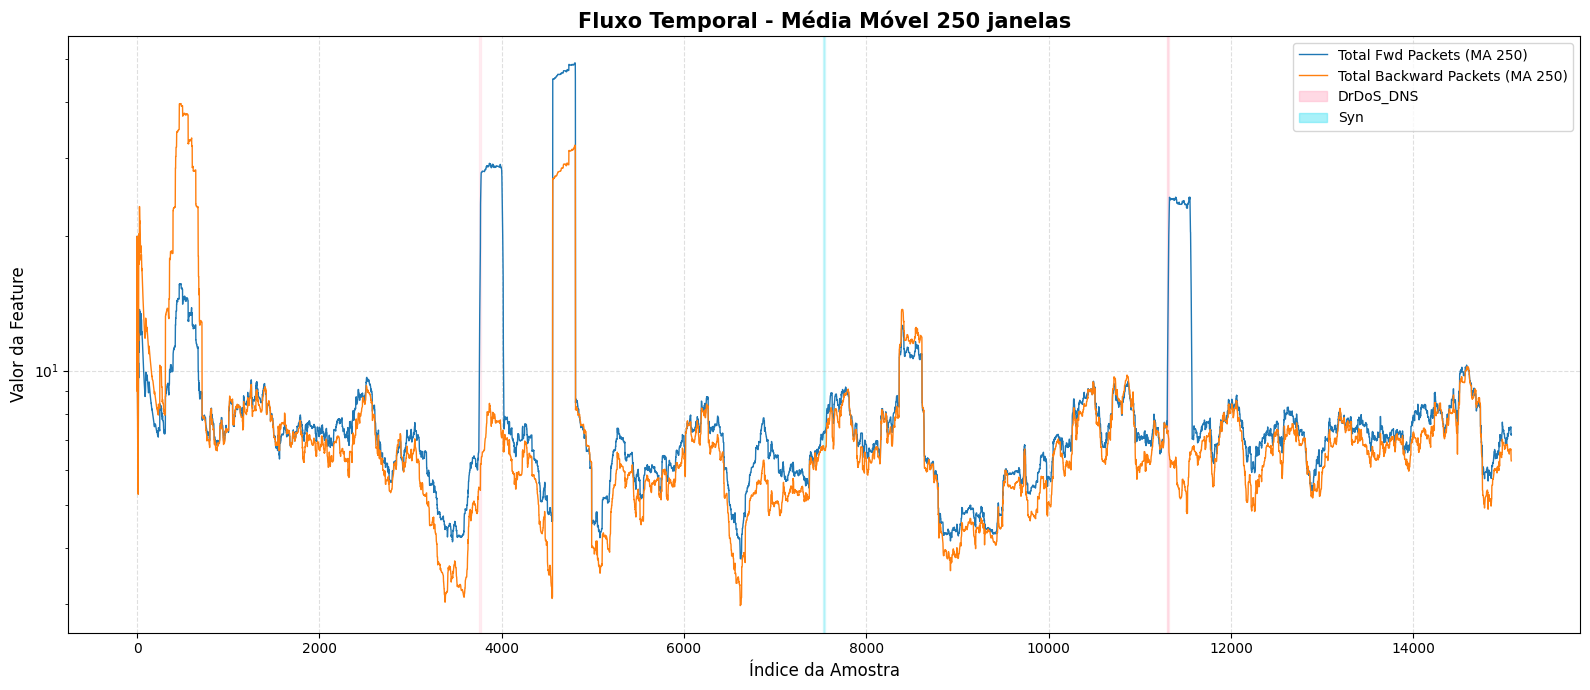


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 250 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15032
DrDoS_DNS      470
Syn            248


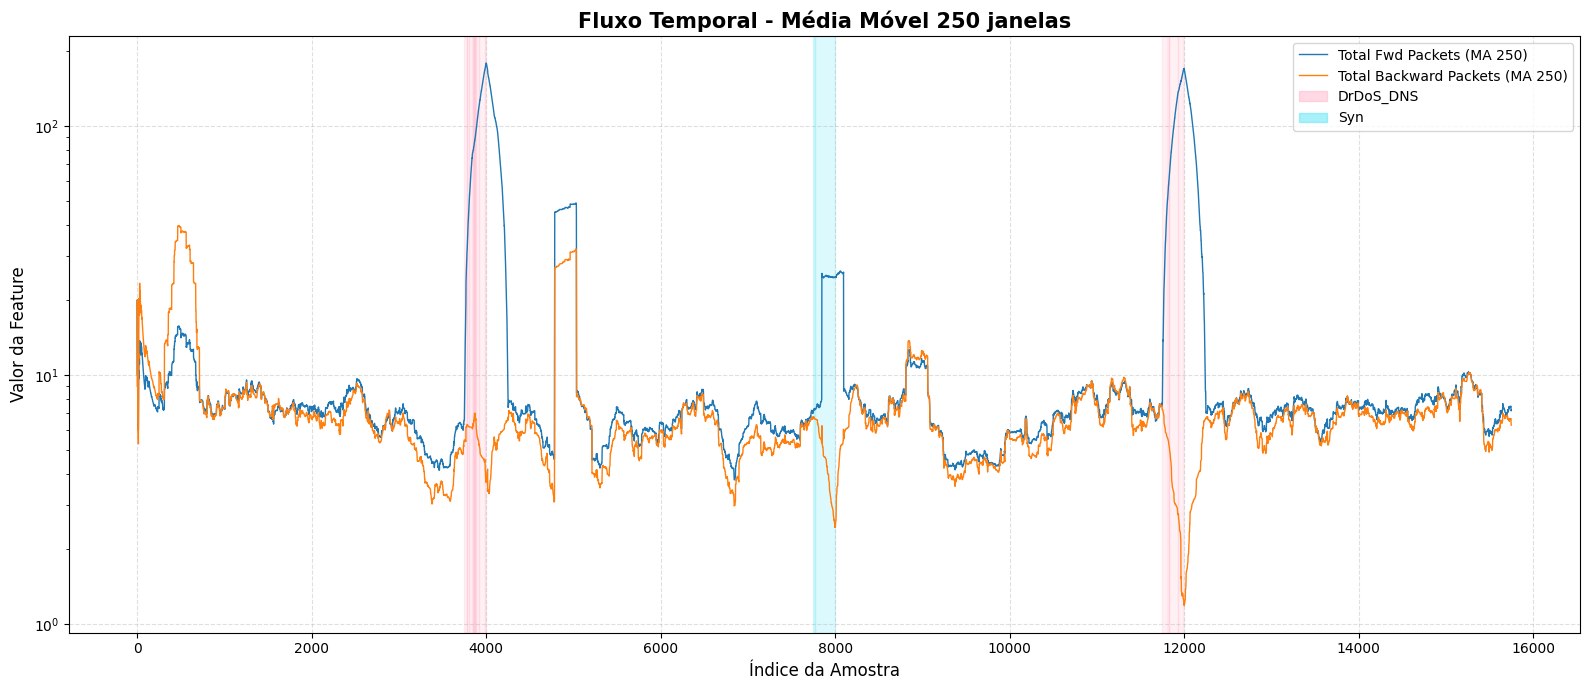


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 500 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15368
DrDoS_DNS      634
Syn            498


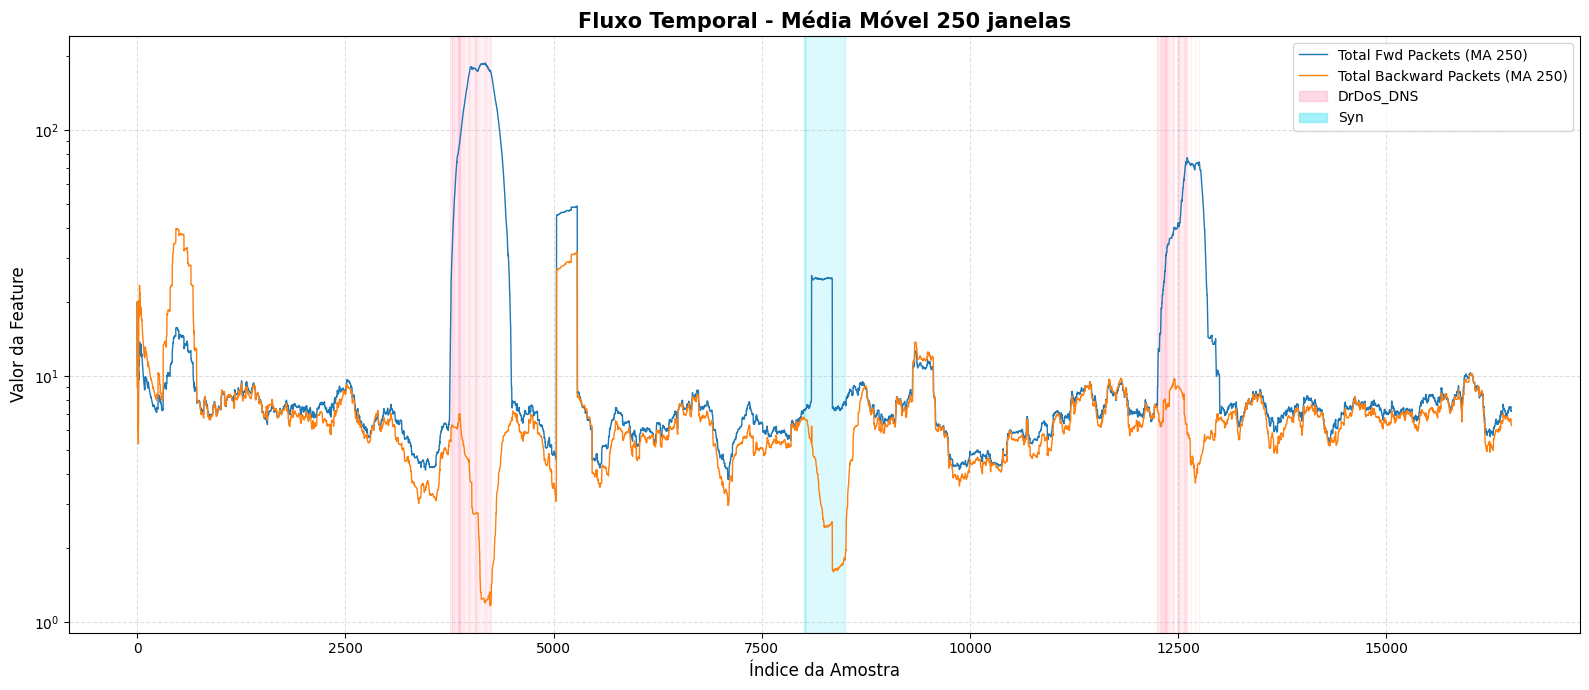


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15433
DrDoS_DNS     1569
Syn            998


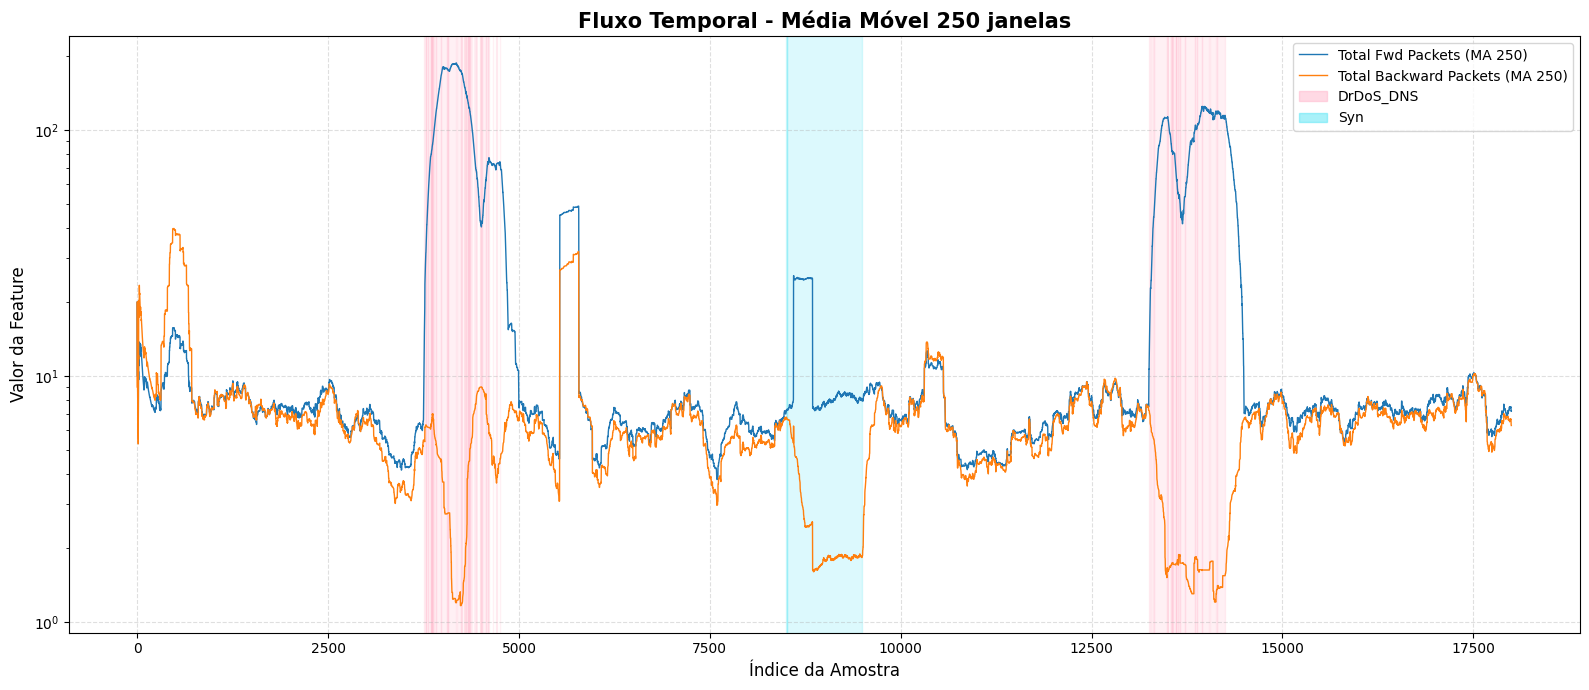


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15522
DrDoS_DNS     3480
Syn           1998


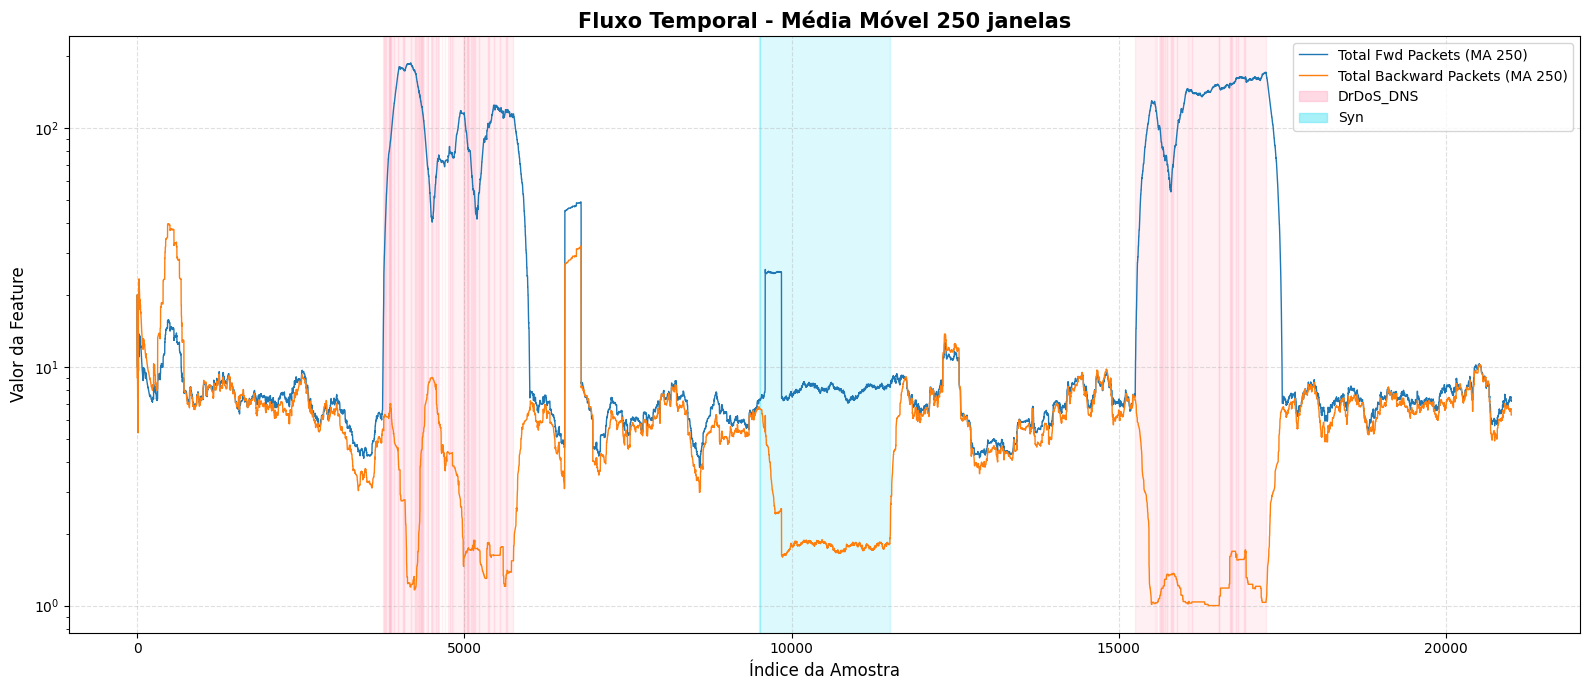

In [13]:
from py.ScenarioGenerator import ScenarioGenerator

for qtd_amostras in AMOSTRAS:
    
    meu_cenario = [
        ("DrDoS_DNS.csv", qtd_amostras),
        ("Syn.csv", qtd_amostras),
        ("DrDoS_DNS.csv", qtd_amostras)
    ]

    caminho_saida = f"{OUTPUT_FOLDER}/Adaptação/Adaptação_{qtd_amostras}.csv"

    gerador = ScenarioGenerator(
        input_folder=INPUT_FOLDER,
        output_path=caminho_saida,
        baseline_file=BASELINE,
        logging=True,
        n_benign_samples=15000, 
        sort_by_timestamp=False,
        remove_duplicates=False
    )

    gerador.generate(meu_cenario)
    gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Cenário de Recorrência

![RECORRENCIA](datasets/CICDDoS2019/img/RECORRENCIA.png)


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 25 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 25 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 25 amostras de DrDoS_LDAP.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15002
DrDoS_DNS        25
DrDoS_LDAP       25
Syn              23


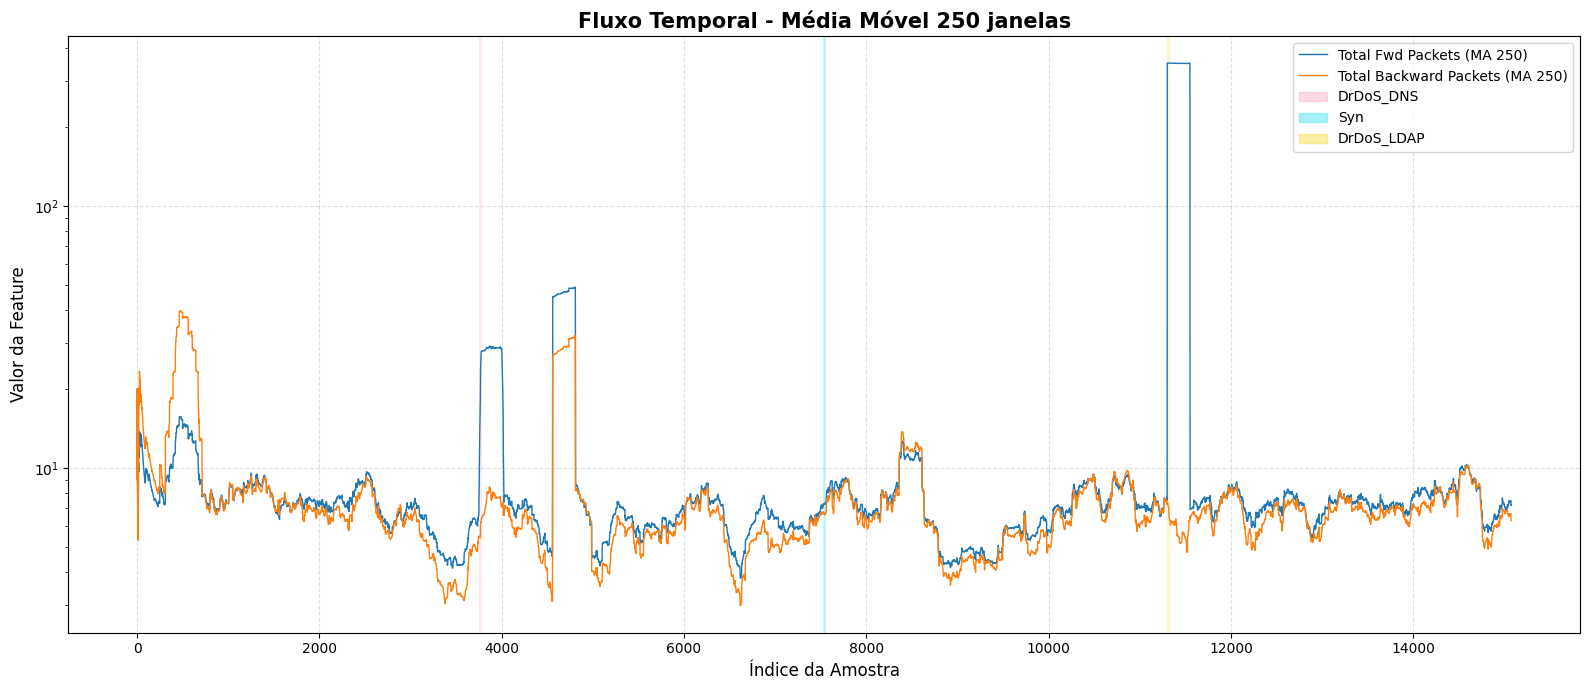


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 250 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_LDAP.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15026
DrDoS_LDAP      250
Syn             248
DrDoS_DNS       226


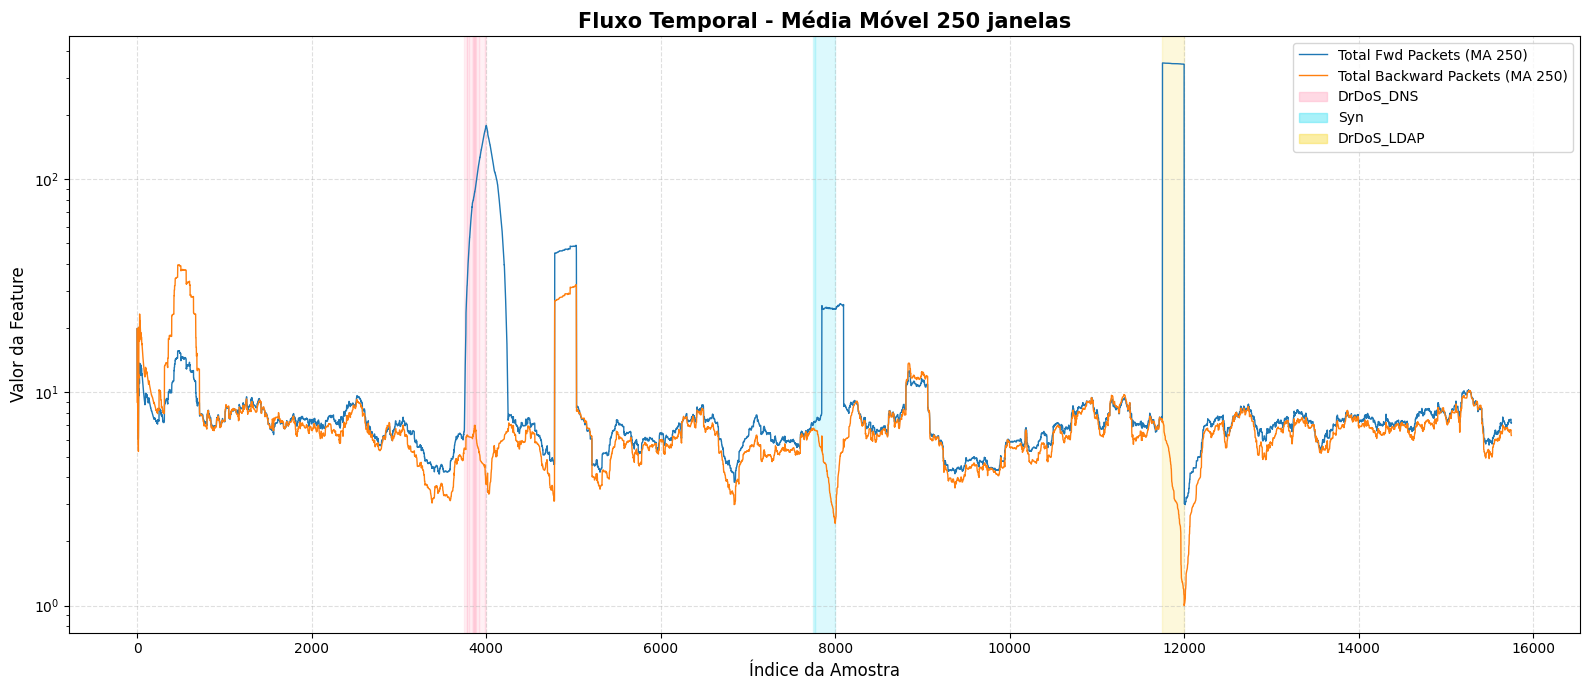


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 500 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 500 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 500 amostras de DrDoS_LDAP.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15032
DrDoS_LDAP      500
Syn             498
DrDoS_DNS       470


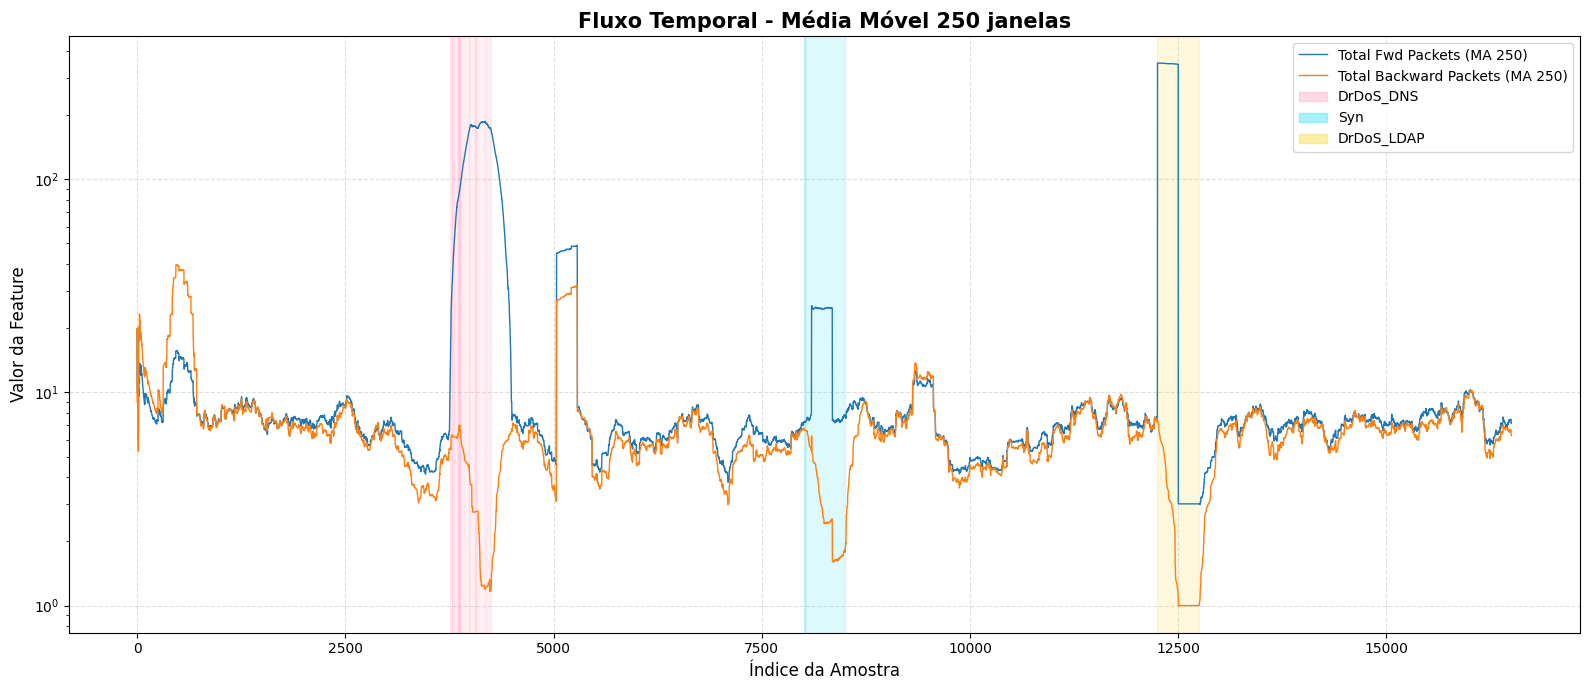


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 1000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 1000 amostras de DrDoS_LDAP.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15368
DrDoS_LDAP     1000
Syn             998
DrDoS_DNS       634


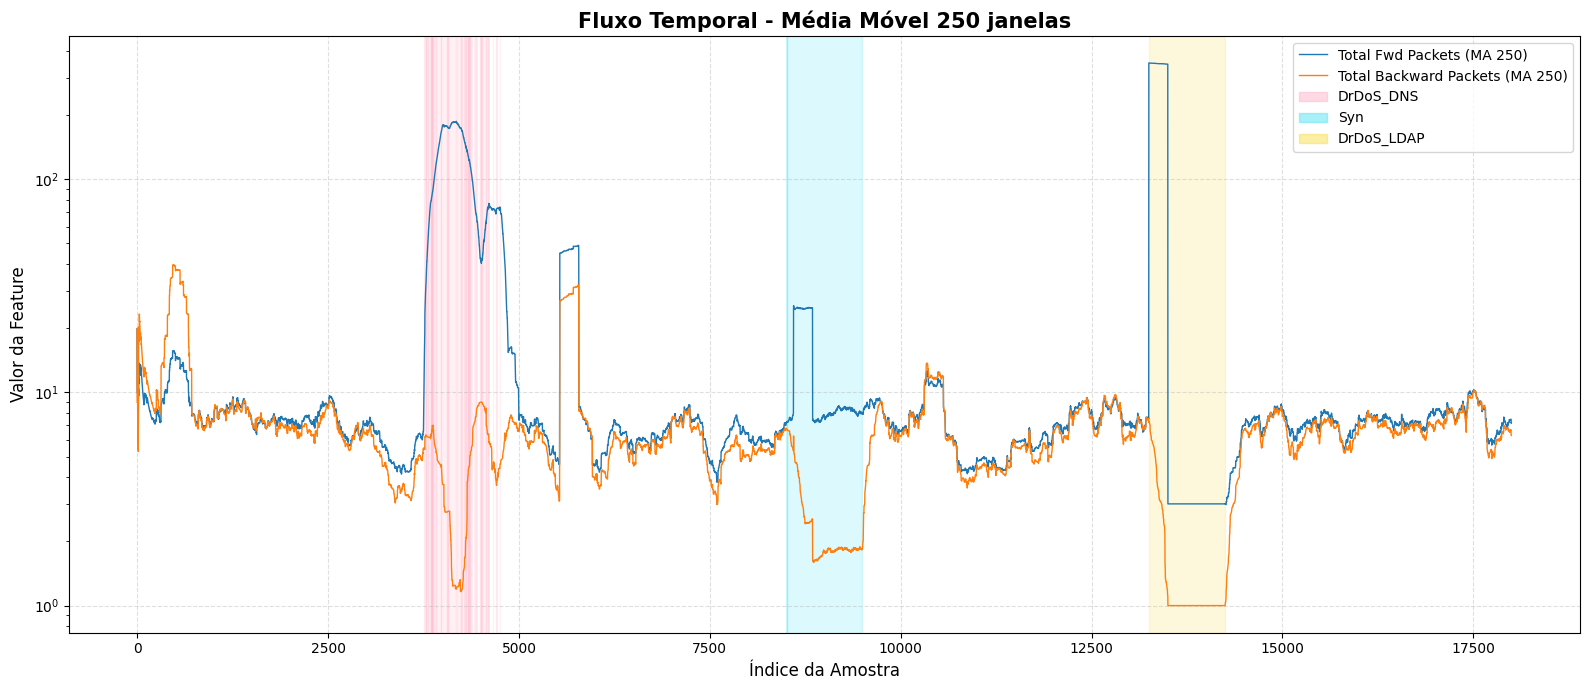


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 2000 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de Syn.csv (Sem filtro).
    -> Bloco montado: 2000 amostras de DrDoS_LDAP.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN        15433
DrDoS_LDAP     2000
Syn            1998
DrDoS_DNS      1569


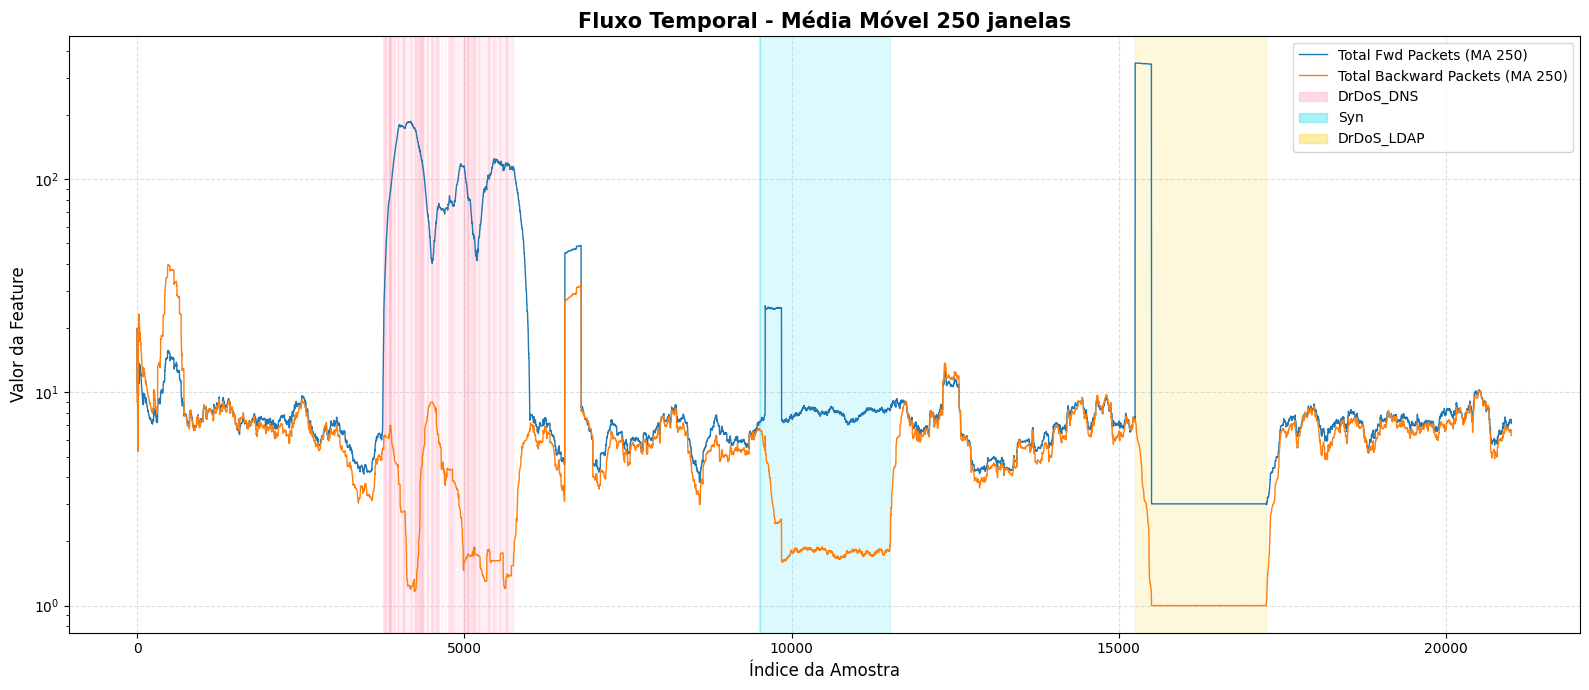

In [14]:
from py.ScenarioGenerator import ScenarioGenerator

for qtd_amostras in AMOSTRAS:
    
    meu_cenario = [
        ("DrDoS_DNS.csv", qtd_amostras),
        ("Syn.csv", qtd_amostras),
        ("DrDoS_LDAP.csv", qtd_amostras)
    ]

    caminho_saida = f"{OUTPUT_FOLDER}/Recorrência/Recorrência_{qtd_amostras}.csv"

    gerador = ScenarioGenerator(
        input_folder=INPUT_FOLDER,
        output_path=caminho_saida,
        baseline_file=BASELINE,
        logging=True,
        n_benign_samples=15000, 
        sort_by_timestamp=False,
        remove_duplicates=False
    )

    gerador.generate(meu_cenario)
    gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

### Cenário Warm-up

![WARM-UP_1](datasets/CICDDoS2019/img/WARM-UP_1.png)

![WARM-UP_2](datasets/CICDDoS2019/img/WARM-UP_2.png)

![WARM-UP_3](datasets/CICDDoS2019/img/WARM-UP_3.png)


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15024
DrDoS_DNS      228


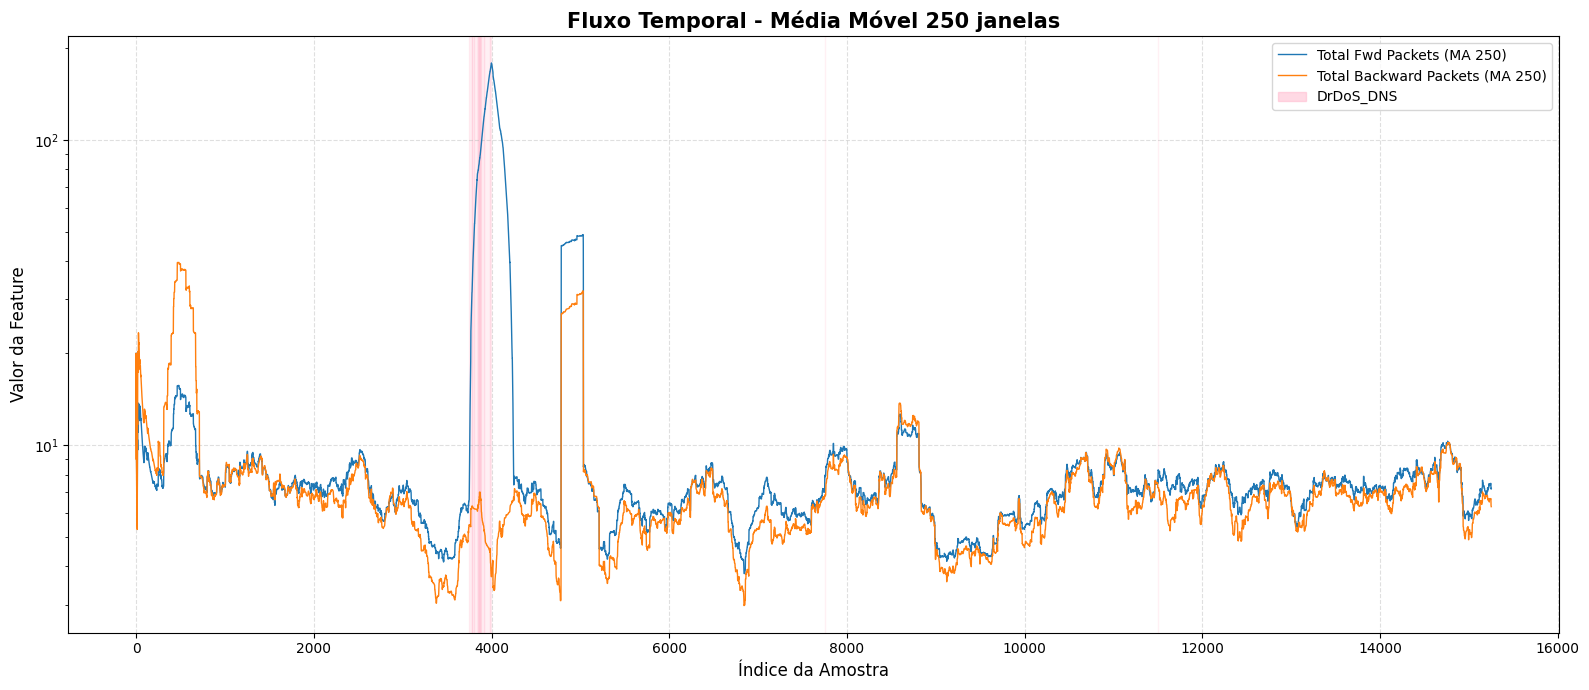


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 1 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15024
DrDoS_DNS      228


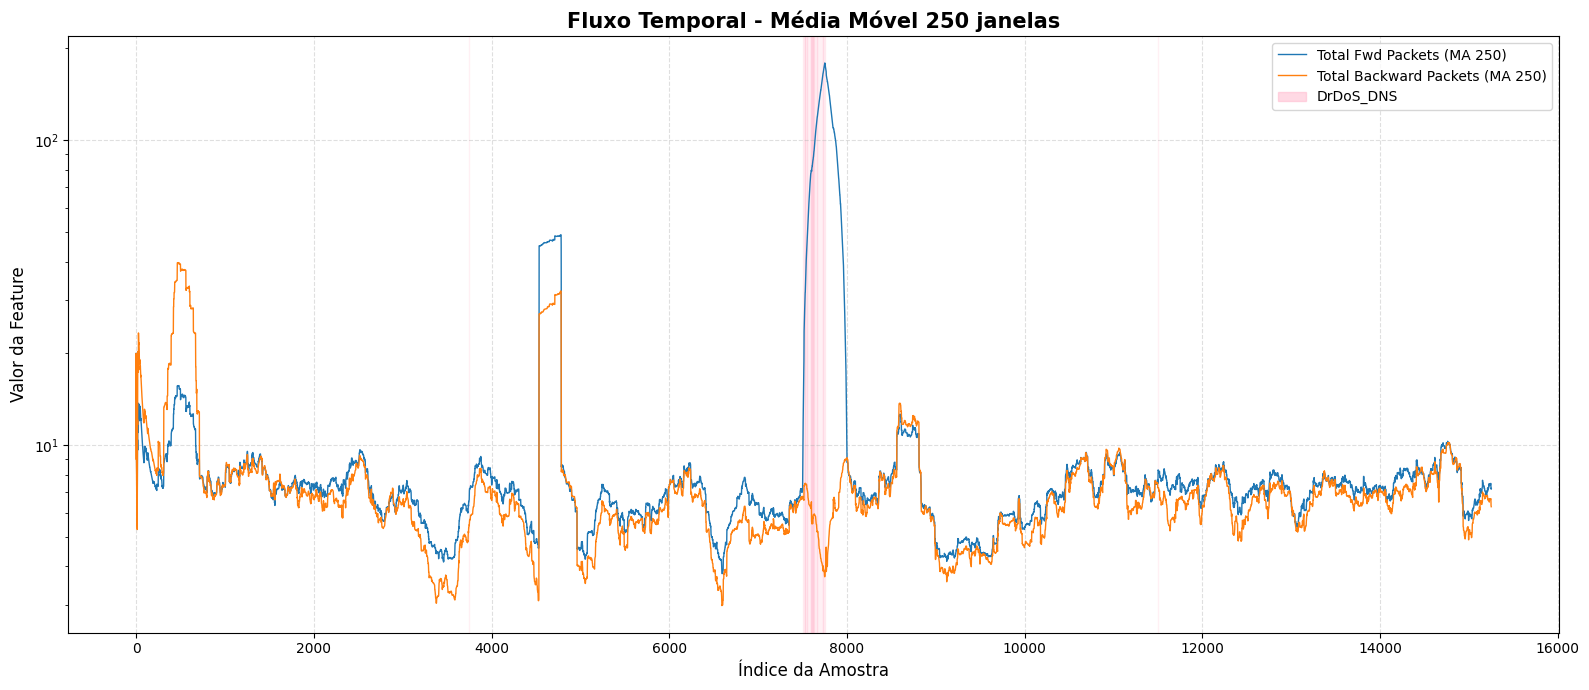


[*] Baseline BENIGN encontrado! Carregando de forma rápida...
    -> 56863 amostras BENIGN carregadas da memória.

[*] Reduzindo amostras benignas para 15000 de forma estratificada...
    -> Estratificando com base na coluna: 'Destination Port'
    -> Redução concluída com sucesso! Total final: 15000 amostras benignas.

[*] Coletando fatias de ataque (Linha a Linha)...
    -> Bloco montado: 1 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 1 amostras de DrDoS_DNS.csv (Sem filtro).
    -> Bloco montado: 250 amostras de DrDoS_DNS.csv (Sem filtro).

[*] Montando fluxo intercalado...
    Dividindo 15000 BENIGN em 4 fatias de aprox. 3750 linhas.
    Salvando no disco...

 SUCESSO! Cenário final salvo e pronto para Análise.
------------------------------------------------------------
Label
BENIGN       15024
DrDoS_DNS      228


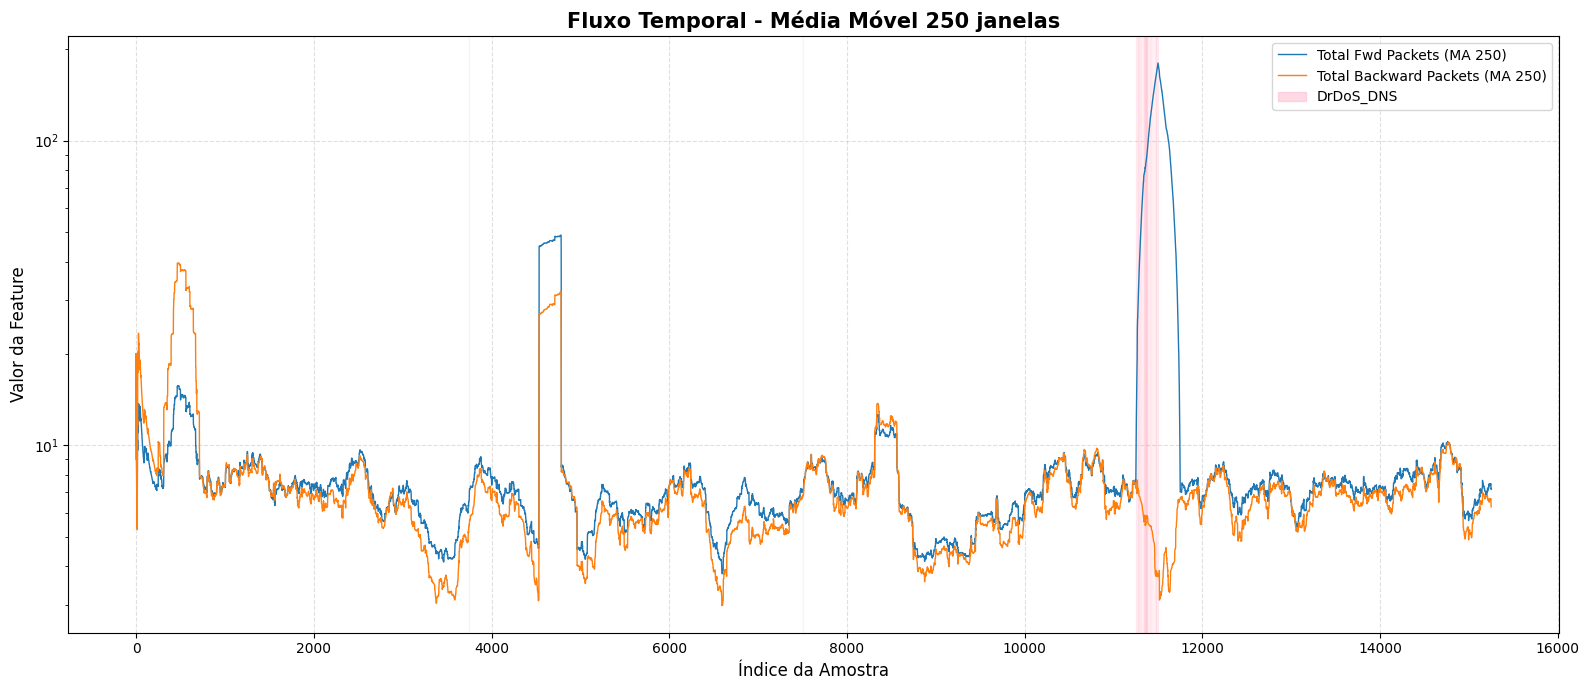

In [15]:
from py.ScenarioGenerator import ScenarioGenerator

matriz_warmup = [
    [250, 1, 1], # Warm-up 1: Ataque real no primeiro bloco
    [1, 250, 1], # Warm-up 2: Ataque real no segundo bloco
    [1, 1, 250]  # Warm-up 3: Ataque real no terceiro bloco
]

for indice, configuracao in enumerate(matriz_warmup, start=1):
    
    meu_cenario = [
        ("DrDoS_DNS.csv", configuracao[0]),
        ("DrDoS_DNS.csv", configuracao[1]),
        ("DrDoS_DNS.csv", configuracao[2])
    ]
    
    caminho_saida = f"{OUTPUT_FOLDER}/Warm-up/Warm-up_{indice}.csv"
    
    gerador = ScenarioGenerator(
        input_folder=INPUT_FOLDER,
        output_path=caminho_saida,
        baseline_file=BASELINE,
        logging=True,
        n_benign_samples=15000, 
        sort_by_timestamp=False,
        remove_duplicates=False
    )
    
    gerador.generate(meu_cenario)
    gerador.plot_scenario(window_size=250, features_plot=['Total Fwd Packets', 'Total Backward Packets'])

## Amostras: 30k 